In [1]:
from clustertools import build_datacube
from clustertools.parameterset import build_parameter_set

from pprint import pprint
import numpy as np
from train_monuseg_hard_clustertools import weight_exclude, exclude_target_and_dice_calibration
from train_monuseg_hard_clustertools import no_distillation_filter, filter_nc_rr, min_weight_only_for_entropy, restrict_fn_absolute
from train_monuseg_baseline_clustertools import min_weight_for_entropy, not_using_incomplete
from ipnb_helpers import ExperimentReader, plot_table

In [2]:
import __main__
setattr(__main__, "weight_exclude", weight_exclude)
setattr(__main__, "exclude_target_and_dice_calibration", exclude_target_and_dice_calibration)
setattr(__main__, "no_distillation_filter", no_distillation_filter)
setattr(__main__, "filter_nc_rr", filter_nc_rr)
setattr(__main__, "min_weight_only_for_entropy", min_weight_only_for_entropy)
setattr(__main__, "min_weight_for_entropy", min_weight_for_entropy)
setattr(__main__, "not_using_incomplete", not_using_incomplete)
setattr(__main__, "restrict_fn_absolute", restrict_fn_absolute)

In [3]:
baseline = ExperimentReader("monuseg-unet-baseline", "monuseg-reeval-baseline")
hard_exp = ExperimentReader("monuseg-unet-hard", "monuseg-reeval-hard")
nogt_exp = ExperimentReader("monuseg-unet-nogt", "monuseg-reeval-nogt")
lset_exp = ExperimentReader("monuseg-unet-lset", "monuseg-reeval-lset")


In [4]:
rows = [
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "constant", "weights_constant": '0.05'},
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "constant", "weights_constant": '0.2'},
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "constant", "weights_constant": '0.5'},
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "constant", "weights_constant": '1.0'},
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "balance_gt" },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_entropy", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_entropy", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_consistency", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_consistency", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_consistency", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_consistency", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "constant", "weights_constant": '0.05'},
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "constant", "weights_constant": '0.2'},
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "constant", "weights_constant": '0.5'},
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "constant", "weights_constant": '1.0'},
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "balance_gt" },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_entropy", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_entropy", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_consistency", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_consistency", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_consistency", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_consistency", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "distil_target_mode": "soft", "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'True' },
    {"type": "no_sparse"},
    {"type": "lset"},
]


In [5]:
def exclude_missing(array):
    if array is None:
        return None
    if np.count_nonzero(array > 0) == 0:
        raise ValueError("no data in this cube")
    array = array.squeeze()
    return np.array([array[i] for i in range(array.shape[0]) if np.count_nonzero(array[i] >= 0)])

def get_best_test_score(exp, **kwargs):
    val = exclude_missing(exp.get_reeval_metric("val_hard_dice", **kwargs))
    if val is None:
        return None
    best_epoch = np.argmax(val, axis=1)
    test = exclude_missing(exp.get_reeval_metric("test_hard_dice", **kwargs))
    return test[np.arange(best_epoch.shape[0]), best_epoch].reshape(-1, 1)

def base_exp_fn(exp_reader, **kwargs):
    if "type" in kwargs:
        if kwargs["type"] == "no_sparse":
            return get_best_test_score(baseline)
        elif kwargs["type"] == "lset":
            return get_best_test_score(lset_exp, monu_nc=kwargs["monu_nc"])
    return get_best_test_score(exp_reader, **kwargs)

In [6]:
pm_template = "${:2.2f} \\pm {:2.2f}$"
bl = get_best_test_score(baseline)
bl_avg, bl_std = np.mean(bl, axis=0), np.std(bl, axis=0)
bl_best = np.argmax(bl_avg)
bl_avg__, bl_std__ = bl_avg[bl_best] * 100, bl_std[bl_best] * 100
bl_score = pm_template.format(bl_avg__, bl_std__)
bl_score

'$79.70 \\pm 0.53$'

In [7]:
from functools import partial
hard_exp_fn = partial(base_exp_fn, hard_exp)
nogt_exp_fn = partial(base_exp_fn, nogt_exp)
columns = [
    (nogt_exp_fn, {"monu_nc": '1', "monu_rr": '1.0', "n_calibration": '0'}),
    (hard_exp_fn, {"monu_nc": '1', "monu_rr": '0.9', "n_calibration": '0'}),
    (nogt_exp_fn, {"monu_nc": '2', "monu_rr": '1.0', "n_calibration": '1'}),
    (nogt_exp_fn, {"monu_nc": '2', "monu_rr": '1.0', "n_calibration": '0'}),
    (hard_exp_fn, {"monu_nc": '2', "monu_rr": '0.9', "n_calibration": '1'}),
    (hard_exp_fn, {"monu_nc": '2', "monu_rr": '0.9', "n_calibration": '0'}),
    (hard_exp_fn, {"monu_nc": '2', "monu_rr": '0.5', "n_calibration": '0'}),
    (hard_exp_fn, {"monu_nc": '3', "monu_rr": '0.5', "n_calibration": '1'}),
    (hard_exp_fn, {"monu_nc": '3', "monu_rr": '0.5', "n_calibration": '0'})
]

In [8]:
plot_table(rows, columns, 30)


\begin{table*}
\begin{tabular}{|ccc|ccccccccc|}
\multicolumn{3}{|c|}{$|\mathcal{D}_l|/|\mathcal{D}_s|$} & 1/29 & 1/29 & 1/28 & 2/28 & 1/28 & 2/28 & 2/28 & 2/27 & 3/27\\
\multicolumn{3}{|c|}{$\rho$} & 100\% &  90\% & 100\% & 100\% &  90\% &  90\% &  50\% &  50\% &  50\%\\
\multicolumn{3}{|c|}{$|\mathcal{D}_{cal}|$} & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0\\
\hline
\multicolumn{12}{|l|}{Constant ($C$)} \\
\hline
             \multicolumn{3}{|c|}{$1.0$}  &                     &                    & 74.30 ± 3.08 &                    & 75.60 ± 2.03 &                    &                    & 79.12 ± 0.83 &                    \\
\hline
\multicolumn{12}{|l|}{Balance} \\
\hline
                                     & &  &                     &                    &                    &                    & 77.60 ± 0.51 &                    &                    & 78.69 ± 1.07 &                    \\
\hline
\multicolumn{12}{|l|}{Entropy - $w_{\text{min}}$} \\
\hline
             \multicolumn{3}{|c|}{$0

In [9]:
sub_rows = [
    [columns[0]],
    [columns[1]],
    columns[2:4],
    columns[4:6],
    [columns[6]],
    columns[7:9]
]

In [10]:
def _get_for_a_given_row(row_idx, more_params):
    arrays = [eval_fn(**params, **rows[row_idx]) for eval_fn, params in more_params]
    arrays = [a for a in arrays if a is not None]
    if len(arrays) == 0:
        return np.array([])
    _meanstd = [(np.mean(a) * 100, np.std(a) * 100) for a in arrays]
    return sorted(_meanstd, key=lambda v: v[0])[-1]

all_row_values = list()
data_per_row = []
meta_per_row = []
for row_elements in sub_rows:
    row_values = [(bl_avg__, bl_std__)]
    params_with_fn = [(eval_fn, {**row_elem_params, **hpparams}) for eval_fn, row_elem_params in row_elements for hpparams in rows[:-3]]
    elems = [eval_fn(**params) for eval_fn, params in params_with_fn]
    elems_params, elems = zip(*[(p, e)  for (_, p), e in zip(params_with_fn, elems) if e is not None])
    if len(elems) == 0:
        print("empty_row")
        continue
    meanstd = [(np.mean(e) * 100, np.std(e) * 100) for e in elems]
    args = sorted(range(len(meanstd)), key=lambda i: meanstd[i][0])
    smeanstd = [meanstd[i] for i in args]
    elems_params = [elems_params[i] for i in args]
    row_values.append(tuple(smeanstd[-1]))
    row_values.append(tuple(smeanstd[0]))
    data_per_row.append([])
    data_per_row[-1].append(("self-training", "blue", "o", smeanstd))
    meta_per_row.append((row_elements[0][1], elems_params))
        
    bl2smeanstd = _get_for_a_given_row(-3, row_elements)
    if len(bl2smeanstd) > 0:
        data_per_row[-1].append(("no self-training", "green", "*", [bl2smeanstd]))
        row_values.append(tuple(bl2smeanstd))
    else:
        row_values.append((-1, -1))
    
    bl3smeanstd = _get_for_a_given_row(-1, row_elements)
    if len(bl3smeanstd) > 0:
        data_per_row[-1].append(("only labeled", "orange", "v", [bl3smeanstd]))
        row_values.append(tuple(bl3smeanstd))
    data_per_row[-1].append(("all data", "red", "^", [(bl_avg__, bl_std__)]))

    print(row_values)
    all_row_values.append(row_values)
    

[(79.6969506870921, 0.5303939611905956), (73.54571395699581, 2.4891949493577434), (72.83166883082747, 2.194560440573287), (-1, -1), (71.48483977150639, 2.88834452497244)]
[(79.6969506870921, 0.5303939611905956), (76.55756684056473, 1.2752366829711526), (73.10141222235762, 2.3239684337750988), (72.62873536825862, 2.5740491618450436), (71.48483977150639, 2.88834452497244)]
[(79.6969506870921, 0.5303939611905956), (76.24787351162037, 2.347679189595688), (73.76505743317445, 2.9187910348593977), (-1, -1), (74.20926716301605, 3.65117828127812)]
[(79.6969506870921, 0.5303939611905956), (77.59997483322456, 0.5134989995748523), (73.95308654195615, 1.9735483794244657), (75.27082745611258, 2.138769122962558), (74.20926716301605, 3.65117828127812)]
[(79.6969506870921, 0.5303939611905956), (78.43281429489394, 1.2603743114200636), (76.14945251477009, 1.5405908364886065), (78.11030160529089, 0.8374128534030684), (74.20926716301605, 3.65117828127812)]
[(79.6969506870921, 0.5303939611905956), (79.11641

In [20]:
from matplotlib import pyplot as plt

def plot_row(current_row, metadata):
    plt.figure()    
    nst = len(current_row[1])
    x_min = 0
    style_params = {"ecolor": "gray", "capsize": 3}
    for label, color, marker, data in current_row:
        if len(data) > 1:
            x = np.arange(x_min, x_min + len(data))
        else:
            x = [x_min]
        x_min += len(data)
        
        plt.errorbar(x, *zip(*data), linestyle='None', label=label, marker=marker, color=color, **style_params)   
    
    plt.title("$|\mathcal{D}_s| = "+ str(30 - int(metadata["monu_nc"])) + "$ / $\\rho = " + str(int(float(metadata["monu_rr"]) * 100)) + "\%$")
    plt.grid()
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.gca().xaxis.grid(False)
    plt.ylim(69, 81)
    plt.ylabel("Dice")
    plt.legend()
    plt.show()

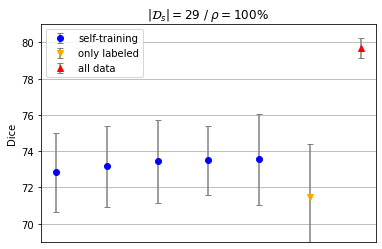

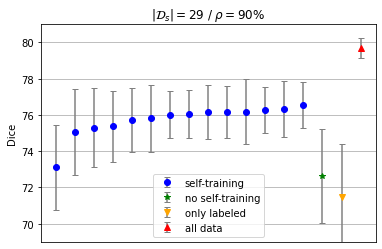

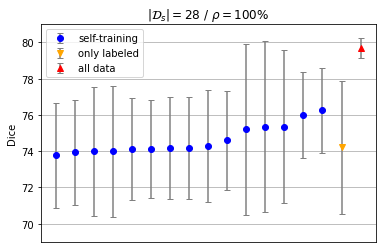

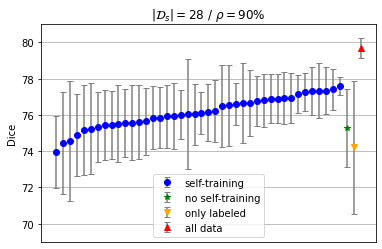

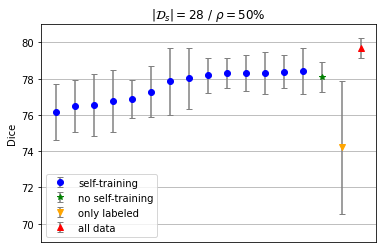

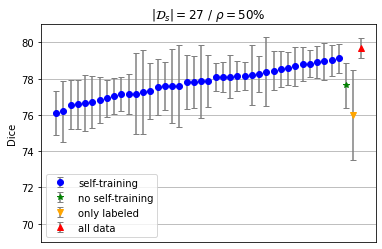

In [21]:
for i in range(len(data_per_row)):   
    plot_row(data_per_row[i], meta_per_row[i][0])

In [22]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

style_maps = {
    "weights_mode": {
        'constant': {'color': colors[0]},
        'balance_gt': {'color': colors[1]},
        'pred_entropy': {'color': colors[2]},
        'pred_consistency': {'color': colors[3]},
        'pred_merged': {'color': colors[4]}
    },
    "distil_target_mode": {
        'hard_dice': {'marker': '^'},
        'soft': {'marker': 'o'}
    }
}

def get_marker_style_params(params):
    return {k: v for p in ["weights_mode", "distil_target_mode"] for k,v in style_maps[p][params[p]].items()}

def plot(all_data, metadata, all_params):
    plt.figure()
    style_params = {"ecolor": "gray", "capsize": 3}
    for i, ((s, e), params) in enumerate(zip(all_data[3], all_params)):
        mode = { 'pred_consistency': 'csty', 'pred_entropy': 'entr', 'balance_gt': 'bala', 'pred_merged': 'merg', 'constant': 'csnt'
    }[params["weights_mode"]]
        dtarget = "soft" if params["distil_target_mode"] == "soft" else "hard"
        label = "{}/{}".format(mode, dtarget)
        plt.errorbar(i, s, e, linestyle='None', label=label, **get_marker_style_params(params), **style_params)   
    
    plt.title("$|\mathcal{D}_s| = "+ str(30 - int(metadata["monu_nc"])) + "$ / $\\rho = " + str(int(float(metadata["monu_rr"]) * 100)) + "\%$")
    plt.grid()
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.gca().xaxis.grid(False)
    plt.ylim(69, 81)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), ncol=2)
    plt.ylabel("Dice")
    plt.show()

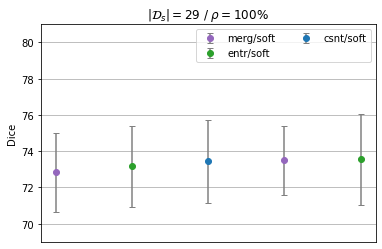

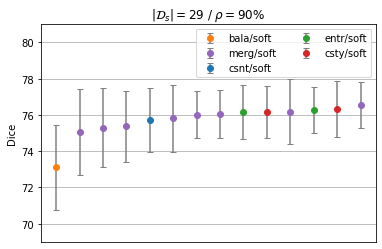

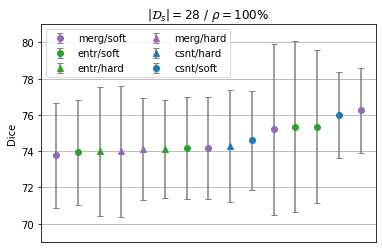

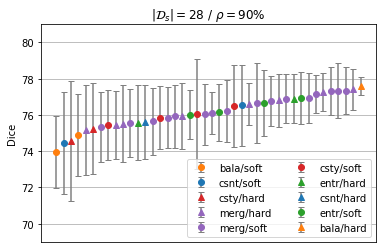

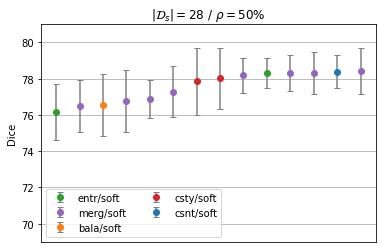

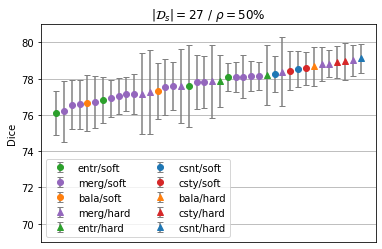

In [23]:
for i in range(len(data_per_row)):  
    plot(data_per_row[i][0], *meta_per_row[i])

In [24]:
max_cols_number = max([len(v) for v in all_row_values])
header_cols = ["\\multirow{2}{*}{" + s + "}" for s in ["$\\mathcal{D}_s$", "$\\rho$"]]
header_cols.append("\\multicolumn{2}{c|}{Self-training}")
header_cols.append("\\multicolumn{3}{c|}{No self-training - baselines}")
header2_cols = ([" "]) * 2 + ["Best", "Worst", "$|\\mathcal{D}_s| = 0$", "$\\mathcal{D}_l \cup \\mathcal{D}_{cal} \cup \\mathcal{D}_s$", "$\\mathcal{D}_l \cup \\mathcal{D}_{cal}$"] 


def print_cell(v1, v2):
    print(pm_template.format(v1, v2) if v1 >= 0 else "/", end=" & ") 

print("\\begin{table*}")
print("\\centering")
print("\\begin{tabular}{|" + ("c" * len(header2_cols)  + "|}"))
print("\\hline")
print(" & ".join(header_cols) + " \\\\")
print("\\cline{3-7}")
print(" & ".join(header2_cols) + " \\\\")
print("\\hline")
ncs = {int(sub_row_data[0][1]["monu_nc"]) for sub_row_data in sub_rows}
multirow_last_col = {nc: len([_ for sub_row_data in sub_rows if int(sub_row_data[0][1]["monu_nc"]) == nc]) for nc in ncs}
prev_key = None
for i, (sub_row_data, row_values) in enumerate(zip(sub_rows, all_row_values)): 
    print(30 - int(sub_row_data[0][1]["monu_nc"]), end=" & ")
    print(str(int(float(sub_row_data[0][1]["monu_rr"]) * 100)) + "\%" , end=" & ")
    print_cell(*row_values[1])
    print_cell(*row_values[2])
    if i == 0:
        print("\\multirow{" + str(len(sub_rows)) + "}{*}{" + pm_template.format(row_values[0][0], row_values[0][1]) + "}", end=" & ")
    else: 
        print("  & ", end="")
    print_cell(*row_values[3])
    curr_key = int(sub_row_data[0][1]["monu_nc"])
    if prev_key != curr_key and multirow_last_col[curr_key] > 1:
        print("\\multirow{" + str(multirow_last_col[curr_key]) + "}{*}{" + pm_template.format(row_values[-1][0], row_values[-1][1]) + "}", end="")
        prev_key = curr_key
    elif multirow_last_col[curr_key] == 1:
        prev_key = curr_key
        print(pm_template.format(row_values[-1][0], row_values[-1][1]), end="")
    print("\\\\")
print("\\hline")
print("\\end{tabular}")
print("\\end{table*}")

\begin{table*}
\centering
\begin{tabular}{|ccccccc|}
\hline
\multirow{2}{*}{$\mathcal{D}_s$} & \multirow{2}{*}{$\rho$} & \multicolumn{2}{c|}{Self-training} & \multicolumn{3}{c|}{No self-training - baselines} \\
\cline{3-7}
  &   & Best & Worst & $|\mathcal{D}_s| = 0$ & $\mathcal{D}_l \cup \mathcal{D}_{cal} \cup \mathcal{D}_s$ & $\mathcal{D}_l \cup \mathcal{D}_{cal}$ \\
\hline
29 & 100\% & $73.55 \pm 2.49$ & $72.83 \pm 2.19$ & \multirow{6}{*}{$79.70 \pm 0.53$} & / & \multirow{2}{*}{$71.48 \pm 2.89$}\\
29 & 90\% & $76.56 \pm 1.28$ & $73.10 \pm 2.32$ &   & $72.63 \pm 2.57$ & \\
28 & 100\% & $76.25 \pm 2.35$ & $73.77 \pm 2.92$ &   & / & \multirow{3}{*}{$74.21 \pm 3.65$}\\
28 & 90\% & $77.60 \pm 0.51$ & $73.95 \pm 1.97$ &   & $75.27 \pm 2.14$ & \\
28 & 50\% & $78.43 \pm 1.26$ & $76.15 \pm 1.54$ &   & $78.11 \pm 0.84$ & \\
27 & 50\% & $79.12 \pm 0.83$ & $76.11 \pm 1.22$ &   & $77.64 \pm 1.24$ & $76.00 \pm 2.46$\\
\hline
\end{tabular}
\end{table*}
